# Part 2 continued: Significance Tests, Covariance, and Correlation

---

As before, let's clear our workspace. In Jupyter we do this be restarting our kernel to clear are variables. In your notebook, press the buttons `Restart Kernel` and `Clear All Outputs`.

In [28]:
# Set the working directory (adapt the path to your directory)
import os
os.chdir("C:/Users/wachb/OneDrive - UvA/CSSci/Stats/revision/Notebooks/notebooks") # put the data files in the same folder!

## Importing Data

---

In [1]:
import pandas as pd  # always remember to import the right packagas
dat2 = pd.read_csv("QoG2012.csv")
dat2[:5]  # let's look at the first 5 rows...

,h_j,wdi_gdpc,undp_hdi,wbgi_cce,wbgi_pse,former_col,lp_lat_abst
0,0.0,628.407410,NaN,-1.545358,-1.934384,0,0.366667
1,0.0,4954.198242,0.781,-0.853812,-0.602608,0,0.455556
2,0.0,6349.720703,0.704,-0.730151,-1.733624,1,0.311111
3,NaN,NaN,NaN,1.326734,1.198044,0,0.470000
4,0.0,2856.751709,0.381,-1.206574,-1.415094,1,0.136667


## Conditional Means & T-Tests

---

We now move on to testing testing the significance of our estimates. A significance test always involves testing against a null-hypothesis, $H_0$. For example, $H_0:$ *our two sample means are the same*. If the results of our test are then significant, we reject $H_0$ and draw the conclusion that our two means are different.

The tests we will conduct are t-tests, which can be either 1-sided or 2-sided. If $H_0$: *our sample means are the same*, the a 1-sided t-test will only reject this hypothesis if one of the means is *either* lower *or* higher, which we specify before the analysis.

In the case of our data, we specify the null-hypothesis as countries that were formerly colonized have the same GDP as countries that weren't. Another way to phrase this is $H0: \bar{x_1} - \bar{x_2} = 0$, where $\bar{x_1}$ is the mean GDP of formerly colonized countries, and $\bar{x_2}$ is the mean GDP of non-colonized countries.

We start with a 2-sided t-test, meaning that our alternative hypothesis is $H_a: \bar{x_1} - \bar{x_2} \neq 0$ 

Lets start by identifying the means of both countries (we call these *conditional means* as they are conditioned on the variable `former_col`).

In [3]:
# Lets first extract the wdi_gdpc variable:
gdp_per_country = dat2['wdi_gdpc']
gdp_col = gdp_per_country[dat2['former_col']==1] # gdp of colonized countries
gdp_not_col = gdp_per_country[dat2['former_col']==0]

In [4]:
# We now use this variable to obtain means:
import numpy as np
mean_gdp_col = np.mean(gdp_col)
mean_gdp_not_col = np.mean(gdp_not_col)

print(f'Mean GDP: \nFormerly colonized: {mean_gdp_col}, \nNot colonized: {mean_gdp_not_col}')

Mean GDP: 
Formerly colonized: 6599.71420976757, 
Not colonized: 16415.39229736328


So, clearly mean difference: former colonies seem poorer...


But is this significant or just by chance? Lets do a t-test for mean difference 0:

In [5]:
import scipy.stats as stats
t, p = stats.ttest_ind(gdp_col, 
                       gdp_not_col, 
                       nan_policy='omit', 
                       alternative='two-sided')
print(f'Found p-value = {p}')   

Found p-value = 1.1208223096770084e-07


P-value is super low, so former colonies are indeed much poorer.

The effect here is the difference between mean of X and mean of Y. So:

In [6]:
mean_gdp_col - mean_gdp_not_col

-9815.67808759571

So, on average 9814.70 (dollars) worse off. Now, what if we had hypothesised a direction? That is to say, we have an a-priori expectation that former colonies have lower levels of wealth? Then our alternative hypothesis ($H_a$) is set to "less". (we could also set H1 to "greater" if we test in the other direction).

We now use a one-sided test, which may more often yield significant results, because you look at only 1 side of the distribution:

In [7]:
t, p = stats.ttest_ind(gdp_col, 
                       gdp_not_col, 
                       nan_policy='omit', 
                       alternative='less')
print(f'Found p-value = {p}')

Found p-value = 5.604111548385042e-08


## Covariance & Correlation

---

Lets look at correlation of continuous DV and continuous IV. I.e., independent variable World Bank Corruption Index.


In [13]:
dat2['wbgi_cce'].describe() # descriptive statistics for the variable

count    192.000000
mean      -0.050715
std        0.994535
min       -1.699529
25%       -0.819649
50%       -0.304757
75%        0.506485
max        2.445654
Name: wbgi_cce, dtype: float64

In [14]:
# With dependent variable World Bank Human Development Index
dat2['undp_hdi'].describe() # descriptive statistics for the variable


count    175.00000
mean       0.69824
std        0.18023
min        0.27300
25%        0.53900
50%        0.75100
75%        0.83350
max        0.95600
Name: undp_hdi, dtype: float64

We can form a hypothesis: Better control of corruption means better human development.

To examine this, we could look at covariance and then correlation:

In [21]:
import numpy as np

IV = dat2['wbgi_cce']
DV = dat2['undp_hdi']
df = pd.DataFrame({'IV': IV, 'DV': DV})

df.cov() # covariance matrix

,IV,DV
IV,0.989101,0.123106
DV,0.123106,0.032483


Note that we make a new DataFrame here and use the method `.cov()`, this way we can circumvent issues of missing values.

Now let's do this for correlation:

In [20]:
df.corr() # correlation matrix

,IV,DV
IV,1.000000,0.682111
DV,0.682111,1.000000


Often times it's easier to run a scatter graph to see relationship. For scatters, the convention is that the IV goes on x-axis and DV on y-axis:

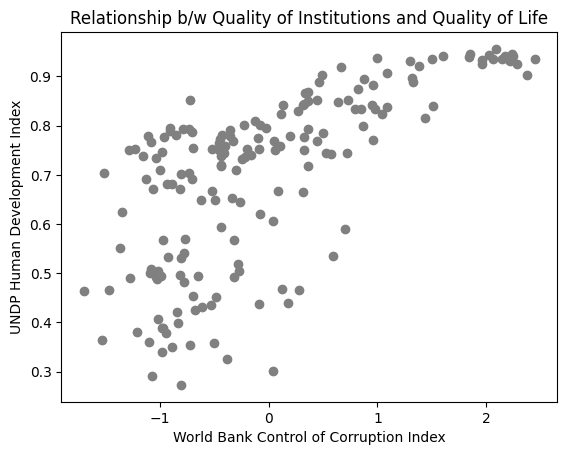

In [22]:
import matplotlib.pyplot as plt

# Scatterplot
plt.scatter(IV, DV, color='gray')
plt.xlabel('World Bank Control of Corruption Index')
plt.ylabel('UNDP Human Development Index')
plt.title('Relationship b/w Quality of Institutions and Quality of Life')
plt.show()

Seems like we are dealing with a positive relationship!